# DataCamp's Python Tutorial to Algorithmic Trading

This is a test notebook that I will use to execute and follow along with the code in the datacamp's tutorial. It will allow me to learn how to use pandas and other platforms to backtest and optimize a strategy; after completing this tutorial, I will backtest a few other basic strategies and other sources. 

Source: https://www.datacamp.com/community/tutorials/finance-python-trading

## Importing packages and financial data in Python

We are also using the fix_yahoo_finance package, with an override, in order to continue to access Yahoo Finance data.

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pandas_datareader as pdr
from alpha_vantage.timeseries import TimeSeries
import fix_yahoo_finance as yf
yf.pdr_override()

ts = TimeSeries(key='QE6ZH3OBL3M61QX3')
%matplotlib inline

Now, we are going to extract the stock prices from Apple for 2006 to 2012, look at some statistical measures of the overall data, and other basic function

In [6]:
aapl = pdr.get_data_yahoo('AAPL',start=datetime.datetime(2006,10,1), end = datetime.datetime(2012,1,1))
aapl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03
mean,28.901012,29.237566,28.507684,28.889151,25.990299,1.882896e+08
std,14.123131,14.199012,14.029758,14.119734,12.702903,1.027007e+08
min,10.488571,10.568571,10.371428,10.461429,9.411687,3.937360e+07
25%,17.457857,17.752857,17.182143,17.431429,15.682291,1.122037e+08
50%,25.260000,25.642857,24.725714,25.120001,22.599365,1.629866e+08
75%,38.777144,39.132858,38.351429,38.699999,34.816683,2.316230e+08
max,60.251427,60.957142,59.427143,60.320000,54.267254,8.432424e+08


In [9]:
aapl.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-12-23,57.098572,57.655716,57.070000,57.618572,51.836887,67349800
2011-12-27,57.585712,58.441429,57.574287,58.075714,52.248165,66269000
2011-12-28,58.127144,58.321430,57.334286,57.520000,51.748211,57165500
2011-12-29,57.628571,57.950001,57.215714,57.874287,52.066956,53994500
2011-12-30,57.644287,58.040001,57.641430,57.857143,52.051525,44915500


In [28]:
monthly_aapl = aapl.resample('M').mean()
monthly_aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-10-31,11.002922,11.123766,10.893117,11.017987,9.912398,1.634995e+08
2006-11-30,12.161565,12.314626,12.028980,12.192109,10.968704,1.647010e+08
2006-12-31,12.415857,12.546500,12.205571,12.353071,11.113516,2.111349e+08
2007-01-31,12.722357,12.880857,12.522572,12.697357,11.423254,3.401223e+08
2007-02-28,12.252105,12.382932,12.111804,12.246842,11.017946,1.805573e+08


In [31]:
aapl['diff bw open close'] = aapl.Open - aapl.Close
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,diff bw open close
Date,,,,,,,
2006-10-02,10.728572,10.838572,10.614285,10.694285,9.621180,178159800,0.034287
2006-10-03,10.635715,10.707143,10.455714,10.582857,9.520932,197677200,0.052858
2006-10-04,10.585714,10.780000,10.451428,10.768572,9.688010,207270700,-0.182858
2006-10-05,10.647142,10.880000,10.590000,10.690000,9.617326,170970800,-0.042858
2006-10-06,10.631429,10.720000,10.544286,10.602858,9.538924,116739700,0.028571


Plot of the closing prices of the AAPL stock, gridded:

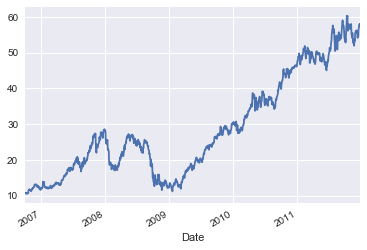

In [33]:
aapl['Close'].plot(grid=True)

## Now, we will explore returns

Calculating daily percentage change for returns, then plotting it.

In [41]:
daily_close = aapl[['Adj Close']]
daily_pct_change = daily_close.pct_change()
daily_pct_change.fillna(0, inplace=True)
daily_log_returns = np.log(daily_close.pct_change()+1)

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03  -0.010474
2006-10-04   0.017396
2006-10-05  -0.007323
2006-10-06  -0.008186
2006-10-09   0.005509
2006-10-10  -0.011049
2006-10-11  -0.007889
2006-10-12   0.027344
2006-10-13  -0.003194
2006-10-16   0.005052
2006-10-17  -0.014831
2006-10-18   0.003225
2006-10-19   0.058120
2006-10-20   0.012080
2006-10-23   0.018711
2006-10-24  -0.005046
2006-10-25   0.007743
2006-10-26   0.006225
2006-10-27  -0.021895
2006-10-30   0.000124
2006-10-31   0.008174
2006-11-01  -0.023965
2006-11-02  -0.002277
2006-11-03  -0.008775
2006-11-06   0.017975
2006-11-07   0.009986
2006-11-08   0.023811
2006-11-09   0.010737
2006-11-10  -0.002643
...               ...
2011-11-17  -0.019314
2011-11-18  -0.006566
2011-11-21  -0.015942
2011-11-22   0.020121
2011-11-23  -0.025610
2011-11-25  -0.009363
2011-11-28   0.033936
2011-11-29  -0.007794
2011-11-30   0.023829
2011-12-01   0.014881
2011-12-02   0.004553
2011-12-05   0.008458
2011-12-06

         Adj Close
count  1323.000000
mean      0.001565
std       0.023983
min      -0.179195
25%      -0.010661
50%       0.001646
75%       0.014285
max       0.139050


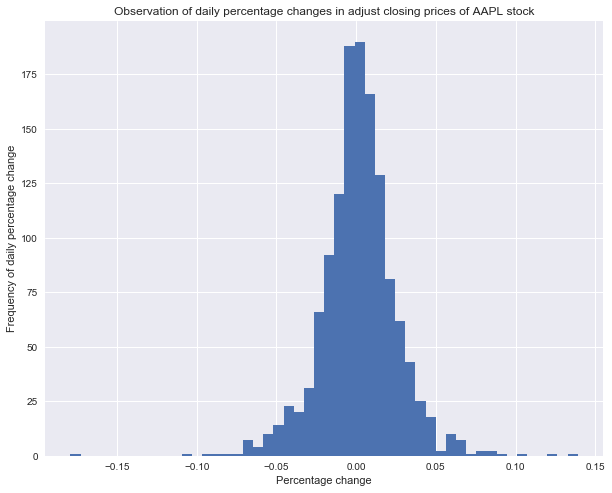

In [51]:
daily_pct_change.hist(bins = 50, figsize=(10,8))
plt.ylabel('Frequency of daily percentage change')
plt.xlabel('Percentage change')
plt.title('Observation of daily percentage changes in adjust closing prices of AAPL stock')
print(daily_pct_change.describe())

Now, we are calculating the cumulative daily rate of return

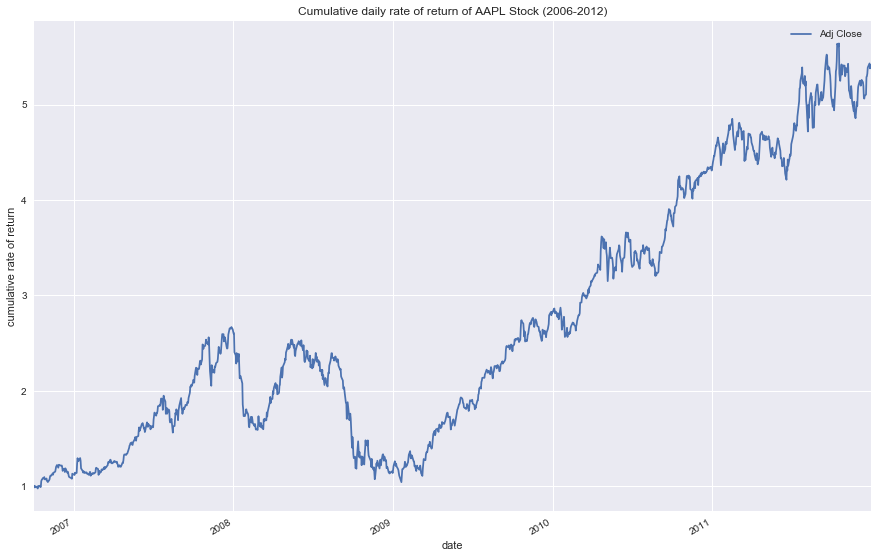

In [47]:
cum_daily_return = (1 + daily_pct_change).cumprod()

cum_daily_return.plot(figsize=(15,10))
plt.xlabel('date')
plt.ylabel('cumulative rate of return')
plt.title('Cumulative daily rate of return of AAPL Stock (2006-2012)')

## Now that we have an idea of how to pull data off Yahoo, apply basic manipulation to the data, and plot the data, we will start pulling more data.

We will start with writing a small script to pull the data for us, taking in tickers, start, and end dates as parameters, and then pull from API for 4 tech giants:

In [91]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2017, 8, 12))
all_data.tail()

Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
GOOG   2017-08-07  929.059998  931.700012  926.500000  929.359985  929.359985   
       2017-08-08  927.090027  935.814026  925.609985  926.789978  926.789978   
       2017-08-09  920.609985  925.979980  917.250000  922.900024  922.900024   
       2017-08-10  917.549988  919.260010  906.130005  907.239990  907.239990   
       2017-08-11  907.969971  917.780029  905.580017  914.390015  914.390015   

                    Volume  
Ticker Date                 
GOOG   2017-08-07  1032200  
       2017-08-08  1061600  
       2017-08-09  1192100  
       2017-08-10  1824000  
       2017-08-11  1204500

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D18947E438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001D1884CD0B8>]], dtype=object)

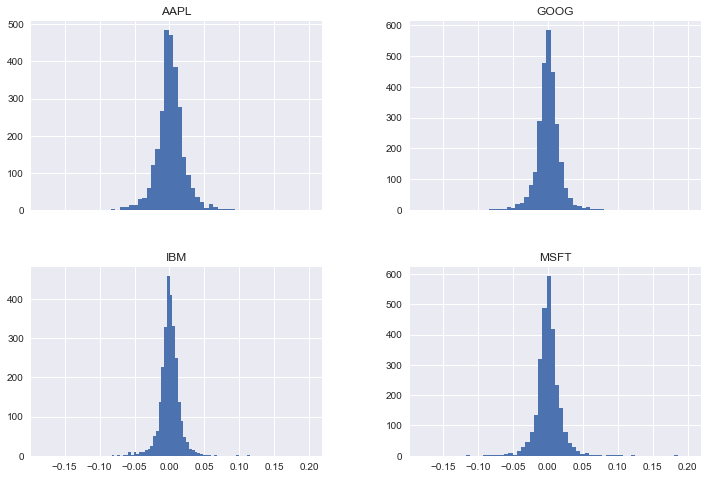

In [94]:
daily_close_px = all_data['Adj Close'].reset_index().pivot('Date','Ticker','Adj Close')
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.hist(bins = 50, sharex = True, figsize=(12,8))

Calculating the Moving Mean of Apple stocks over a 40-day frame.

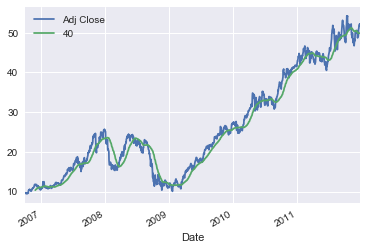

In [96]:
aapl['40'] = aapl['Adj Close'].rolling(window=40).mean()
aapl[['Adj Close', '40']].plot()

Calculating volatiility of AAPL stock, or change in variance of stock's returns over a period of time. The more volatile, the more speculative it is. We find volatility by taking standard deviation of %-change in stock

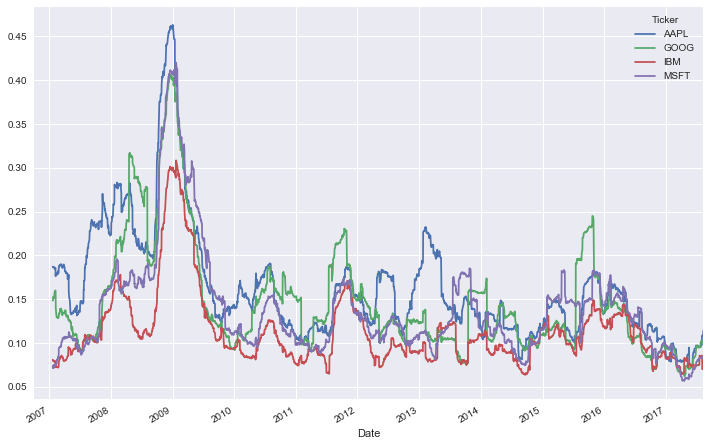

In [98]:
volatility = daily_pct_change.rolling(75).std() * np.sqrt(75)
volatility.plot(figsize=(12,8))

# Momentum and Mean-Reversion strategies

At this point in the tutorial, we begin looking into a common momentum-based strategy. 

A momentum-based strategy is focused on following some item that will continue to move in a certain direction; we want to take advantage of this trend. Some examples of momentum strategies include moving average crossovers and turtle trading. 

A mean-reversion based strategy is focused on a quantity that will fluctuate in price, but will eventually revert back to a mean value. These strategies exploit that fact, taking advantage of anything that fluctuates. The strategy focuses especially on the cointegration factor between two quantities, and possibly the correlation. Examples include pairs trading and uni-directional strategies.

## Moving Average Crossover Implementation

We will create two Simple Moving Averages (SMA) of time series with two lookback periods, 40 and 100 days. If short exceeds long moving average, then we go long; if long moving average exceeds short moving, then we exit.

In [108]:
short_lookback_window = 40
long_lookback_window = 100

signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0
signals['short_moving_avg'] = aapl['Adj Close'].rolling(short_lookback_window, min_periods = 1, center = False).mean()
signals['long_moving_avg'] = aapl['Adj Close'].rolling(long_lookback_window, min_periods = 1, center = False).mean()

#Signal when short moving average crosses long moving average, for period greater than shortest moving average window.
signals.signal[short_lookback_window:] = np.where(signals.short_moving_avg[short_lookback_window:] > 
                                         signals.long_moving_avg[short_lookback_window:], 1.0, 0.0)

#Determine trading orders. When signal shifts from 0 to 1, we go long. From 1 to 0 (reflected in positions columns by
# a -1), we exit.

signals['positions'] = signals['signal'].diff()


Now we will plot the moving averages, along with the signals:

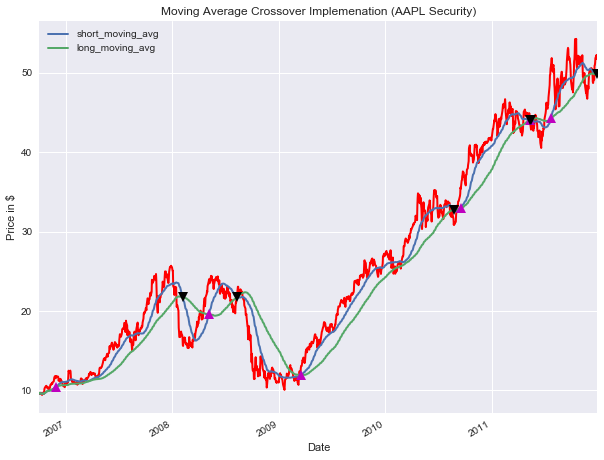

In [130]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(111, ylabel = 'Price in $')

aapl['Adj Close'].plot(ax=ax1, color='r', lw=2.)

signals[['short_moving_avg', 'long_moving_avg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_moving_avg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_moving_avg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
plt.title('Moving Average Crossover Implemenation (AAPL Security)')

## Backtesting

Backtesting is when we see how well our strategy does against historical data. We get a realistic idea of its performance, and see if it's even viable in the first place. However, it comes with a lot of drawbacks:

### Watch out for: 

Survivorship Bias: When the losers (or underperforming securities) are deleted from a database, leaving only the survivors and winners.The further back in time the historical data goes, the more prevalent survivorship bias is; this bias is BAD because it can greatly skew our feedbacks, including the strategy's Sharpe ratio and drawdown periods. The best way to take this into account is to avoid testing on historical data further than 10 years from our current date.

Look-Ahead Bias: When the data is for stock prices are already there, we can see exactly how the strategy performs. However, when we test it in a present market, we don't have access to data from the future. Some strategies can become unrealistic: "Exit when we see the biggest dip in prices for the day." We can't do that in present markets; without knowing the closing price for today, we don't know when the stock is at its daily low! Don't introduce information into past data!!

Market Regime Shifts: Large macroeconomic events and shifts. Example: SEC regulatory changes.

Liquidity constraints: Makes it harder to exit a position/ implement a strategy. Example: Ban of short sales.

Transaction Costs: Slippage, Brokerage fees, market impact.

### Essential Components:

Data Handler: Handle the set of data (Pandas Datareader library or excel spreadsheet)

Strategy: To know what to do with the financial instrument!

Portfolio: To generate orders (i.e. daily basket order sent to brokerages), manage Profit & Loss

Execution Handler: Actually sends order to broker, receives the signals that order has been executed.

In [127]:
###The Data Handler has already been implemented earlier, with the aapl Pandas DataFrame, where we pulled from Yahoo Finance.

initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   

# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)

portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum()  

portfolio['total'] = portfolio['cash'] + portfolio['holdings']

portfolio['returns'] = portfolio['total'].pct_change()

Now we will plot the portfolio total value, obtaining an equity curve:

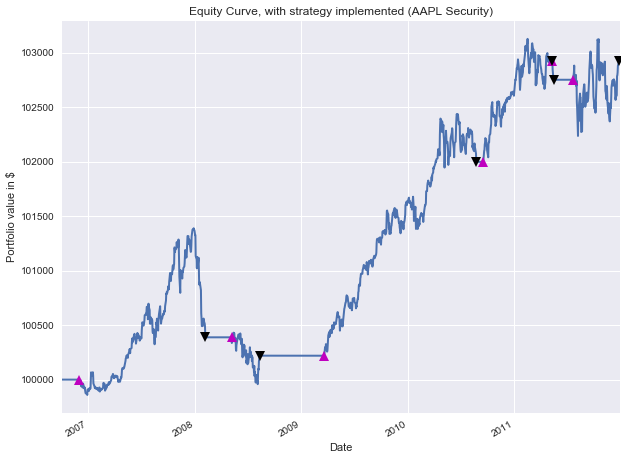

In [129]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

plt.title('Equity Curve, with strategy implemented (AAPL Security)')

Now, we are going to calculate the Sharpe ratio of this portfolio, to see if it is even worth spending time on optimizing it:

In [136]:
portfolio_returns = portfolio['returns']

#Calculate annualized Sharpe Ratio. 252 trading days in a year. Risk-free rate is excluded 
#for some reason. Tutorial doesn't explain why.

sharpe_ratio = np.sqrt(252) * ((portfolio_returns.mean())/ portfolio_returns.std())
sharpe_ratio

0.72613495141739981

Now, we will calculate the maximum drawdown for this portfolio, by analyzing its equity curve. If the drawdown is below a certain threshold we have established for this particular strategy, then it is too unreliable to implement.

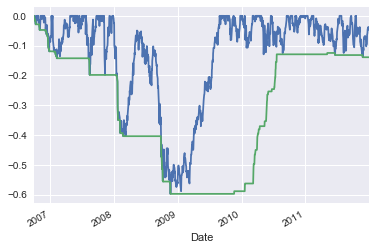

In [138]:
yearly_window = 252

rolling_max = aapl['Adj Close'].rolling(yearly_window, min_periods = 1).max()

daily_drawdown = aapl['Adj Close']/rolling_max - 1.0

max_daily_drawdown = daily_drawdown.rolling(yearly_window, min_periods = 1).min()

daily_drawdown.plot()
max_daily_drawdown.plot()